# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
df=pd.read_csv("D:\DOWNLOADS/data(3).csv")
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


# Dataset Description

**DBNOs** - Number of enemy players knocked.                                                                               
**assists** - Number of enemy players this player damaged that were killed by teammates.                                  
**boosts** - Number of boost items used.                                                                                  
**damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted. <br>
**headshotKills** - Number of enemy players killed with headshots. <br>
**heals** - Number of healing items used. <br>
**Id** - Player’s Id <br>
**killPlace** - Ranking in match of number of enemy players killed. <br>
**killPoints** - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”. <br>
**killStreaks** - Max number of enemy players killed in a short amount of time. <br>
kills - Number of enemy players killed. <br>
**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat. <br>
**matchDuration** - Duration of match in seconds.
**matchId** - ID to identify matches. There are no matches that are in both the training and testing set.<br>
**matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.<br>
**rankPoints** - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.<br>
**revives** - Number of times this player revived teammates.<br>
**rideDistance** - Total distance traveled in vehicles measured in meters.<br>
**roadKills** - Number of kills while in a vehicle.<br>
**swimDistance** - Total distance traveled by swimming measured in meters.<br>
**teamKills** - Number of times this player killed a teammate.<br>
**vehicleDestroys** - Number of vehicles destroyed.<br>
**walkDistance** - Total distance traveled on foot measured in meters.<br>
**weaponsAcquired** - Number of weapons picked up.<br>
**winPoints** - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.<br>
**groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.<br>
**numGroups** - Number of groups we have data for in the match.<br>
**maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.<br>
**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [4]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [5]:
# find categorical variables

categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [6]:
# view the categorical variables

print(categorical)

['Id', 'groupId', 'matchId', 'matchType']


In [7]:
# view the top five rows of categorical variables

df[categorical].head()

,Id,groupId,matchId,matchType
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,squad-fpp
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,squad-fpp
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,solo-fpp
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,squad-fpp
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,solo


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'squad-fpp'),
  Text(1, 0, 'solo-fpp'),
  Text(2, 0, 'solo'),
  Text(3, 0, 'duo'),
  Text(4, 0, 'duo-fpp'),
  Text(5, 0, 'squad'),
  Text(6, 0, 'normal-squad-fpp'),
  Text(7, 0, 'normal-duo-fpp'),
  Text(8, 0, 'normal-solo-fpp'),
  Text(9, 0, 'crashfpp'),
  Text(10, 0, 'crashtpp'),
  Text(11, 0, 'normal-squad'),
  Text(12, 0, 'flaretpp'),
  Text(13, 0, 'flarefpp'),
  Text(14, 0, 'normal-duo'),
  Text(15, 0, 'normal-solo')])

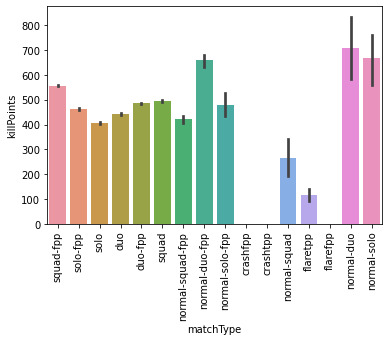

In [8]:
sns.barplot(x='matchType', y='killPoints', data=df)
plt.xticks(rotation=90)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['matchType']=le.fit_transform(df['matchType'])

In [10]:
df[categorical].head()

,Id,groupId,matchId,matchType
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,15
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,15
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,13
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,15
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,12


match type is only useful feature to use

In [11]:
# find numerical variables

numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 27 numerical variables


In [12]:
# view numerical variables

print(numerical)

['Unnamed: 0', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']


In [13]:
# view the top 5 rows of numerical variables

df[numerical].head()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,0,0,25.93,0,0,0,84,1437,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,0,0,36.71,0,0,0,57,1225,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,0,1,47.73,0,0,0,50,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,0,0,0.00,0,0,0,56,1286,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,0,2,100.00,0,0,3,31,0,1,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [14]:
# estimate correlation coefficients

pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Unnamed: 0,1.0000,0.0015,0.0006,-0.0000,-0.0003,0.0014,-0.0007,0.0001,0.0001,0.0002,...,-0.0005,0.0006,0.0002,0.0008,0.0001,-0.0005,-0.0003,-0.0001,0.0000,-0.0001
assists,0.0015,1.0000,0.3066,0.4094,0.3022,0.1995,0.2285,-0.2900,0.0383,0.3221,...,0.1979,0.1105,0.0124,0.0229,0.0078,0.0582,0.2886,0.2446,0.0233,0.2977
boosts,0.0006,0.3066,1.0000,0.5196,0.3579,0.3315,0.5354,-0.5540,0.0090,0.4995,...,0.2541,0.3293,0.0338,0.1079,0.0146,0.0860,0.6394,0.4053,-0.0070,0.6335
damageDealt,-0.0000,0.4094,0.5196,1.0000,0.7351,0.6133,0.3416,-0.6761,0.0502,0.8890,...,0.2563,0.1398,0.0507,0.0375,0.0162,0.0799,0.3966,0.3545,0.0180,0.4390
DBNOs,-0.0003,0.3022,0.3579,0.7351,1.0000,0.4674,0.2653,-0.5549,0.0421,0.7062,...,0.3011,0.1019,0.0357,0.0187,0.0713,0.0599,0.2841,0.2177,0.0105,0.2793
headshotKills,0.0014,0.1995,0.3315,0.6133,0.4674,1.0000,0.1979,-0.4681,0.0242,0.6737,...,0.1491,0.0763,0.0120,0.0300,0.0092,0.0399,0.2496,0.2156,0.0050,0.2762
heals,-0.0007,0.2285,0.5354,0.3416,0.2653,0.1979,1.0000,-0.3855,-0.0020,0.3105,...,0.2364,0.2977,0.0234,0.0810,0.0358,0.0627,0.4293,0.3082,-0.0103,0.4273
killPlace,0.0001,-0.2900,-0.5540,-0.6761,-0.5549,-0.4681,-0.3855,1.0000,-0.0236,-0.7290,...,-0.2701,-0.2364,-0.0575,-0.0899,-0.0396,-0.0727,-0.5901,-0.4897,-0.0026,-0.7191
killPoints,0.0001,0.0383,0.0090,0.0502,0.0421,0.0242,-0.0020,-0.0236,1.0000,0.0365,...,0.0127,-0.0279,-0.0045,-0.0058,-0.0399,-0.0093,0.0049,-0.0042,0.9834,0.0131
kills,0.0002,0.3221,0.4995,0.8890,0.7062,0.6737,0.3105,-0.7290,0.0365,1.0000,...,0.2532,0.1147,0.0618,0.0400,0.0192,0.0786,0.3735,0.3382,0.0072,0.4185


In [15]:
corr_matrix['winPlacePerc'].sort_values(ascending=False)

winPlacePerc       1.0000
walkDistance       0.8108
boosts             0.6335
weaponsAcquired    0.5825
damageDealt        0.4390
heals              0.4273
kills              0.4185
longestKill        0.4089
killStreaks        0.3768
rideDistance       0.3430
assists            0.2977
DBNOs              0.2793
headshotKills      0.2762
revives            0.2409
swimDistance       0.1503
vehicleDestroys    0.0724
numGroups          0.0407
maxPlace           0.0384
roadKills          0.0348
teamKills          0.0156
rankPoints         0.0135
killPoints         0.0131
winPoints          0.0073
Unnamed: 0        -0.0001
matchDuration     -0.0057
matchType         -0.0301
killPlace         -0.7191
Name: winPlacePerc, dtype: float64

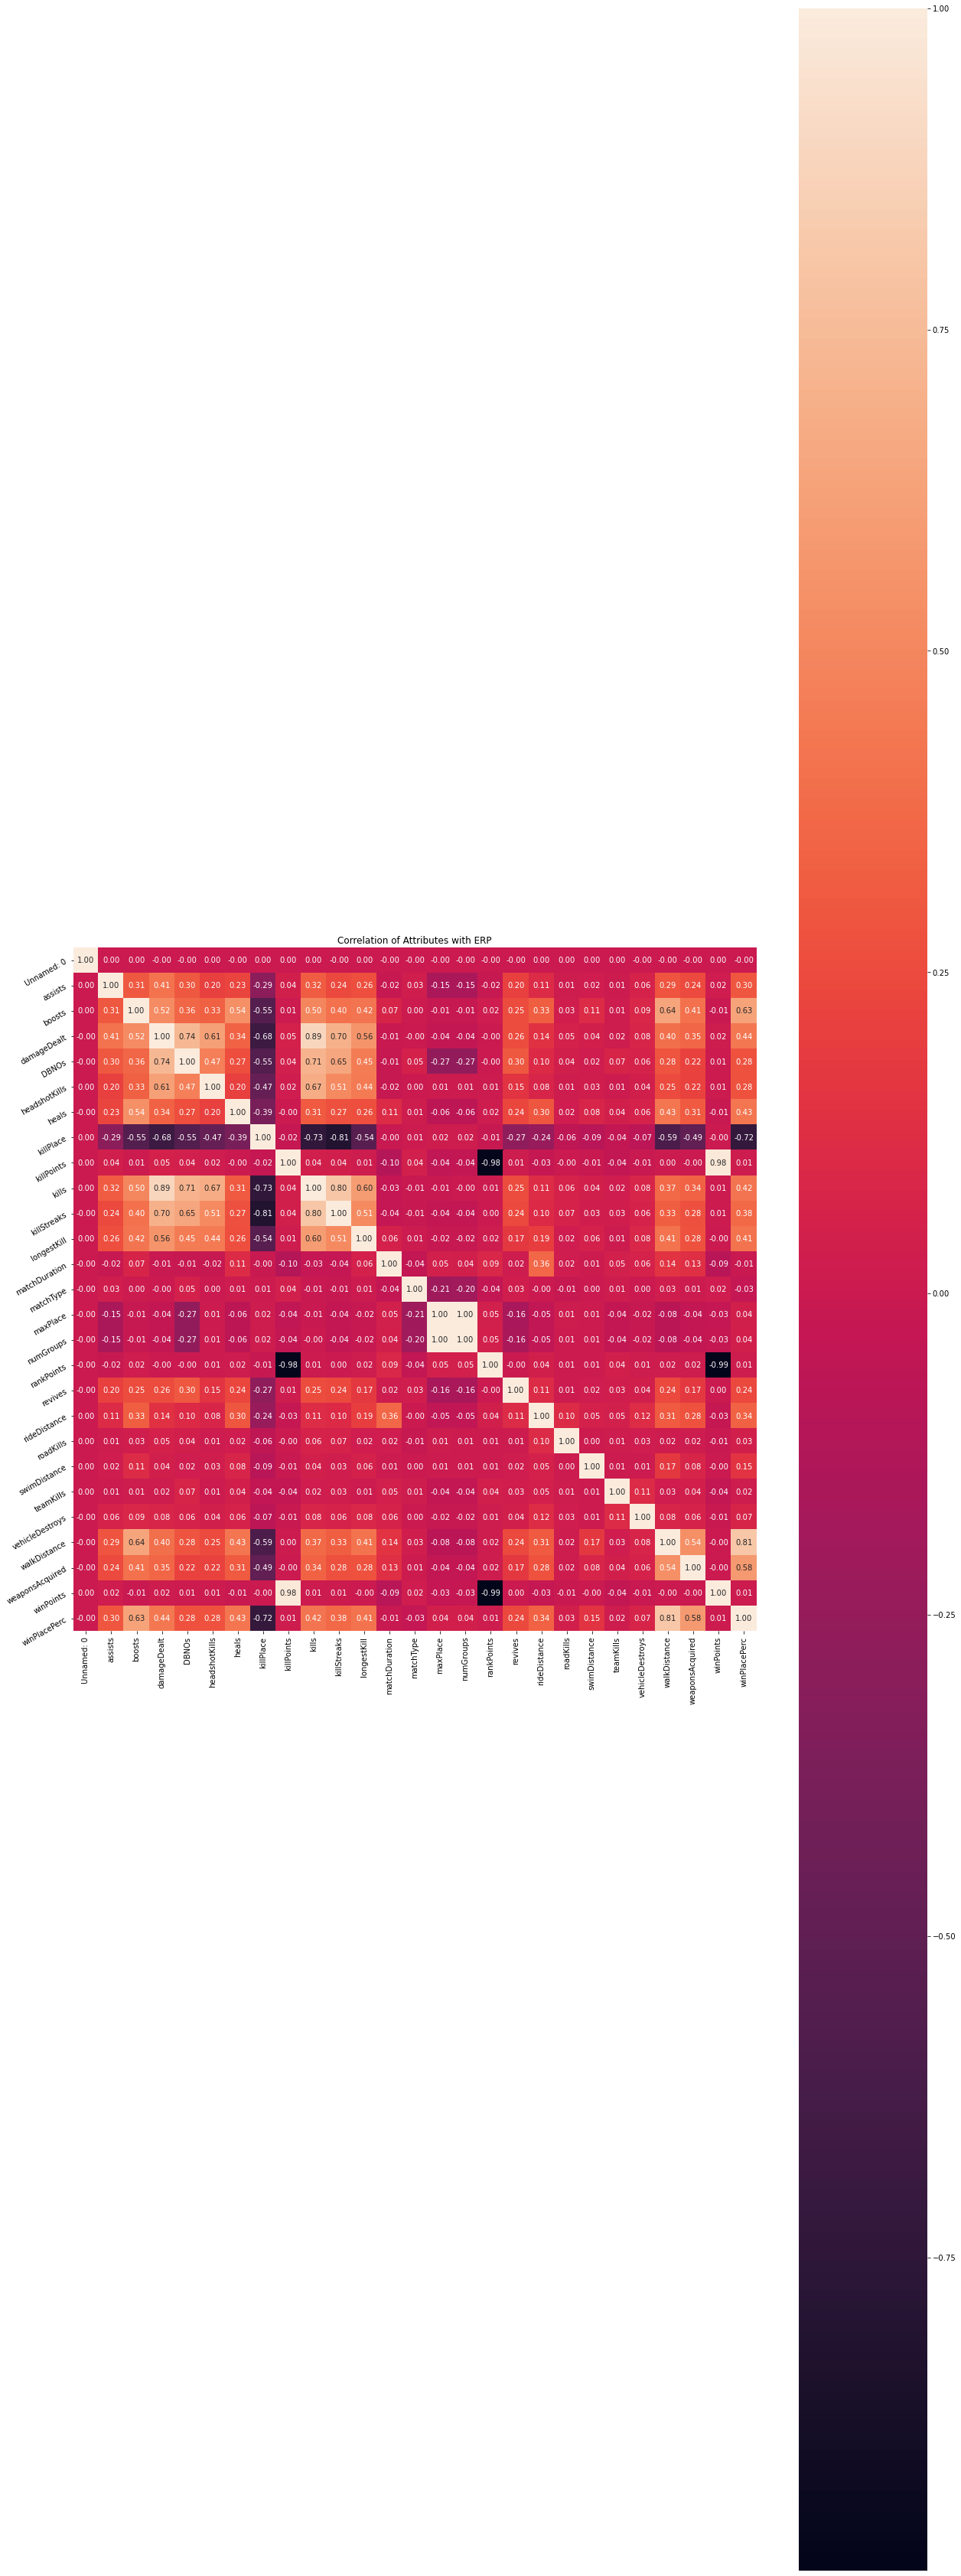

In [16]:
plt.figure(figsize=(20,116))
plt.title('Correlation of Attributes with ERP')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

we can see kill points and win points are positively correalted.

**Interpretation of correlation coefficient**

The correlation coefficient ranges from -1 to +1. 

Now We create new df with only required inputs.

In [17]:
df=df[['walkDistance','boosts', 'weaponsAcquired', 'damageDealt', 'heals', 'longestKill', 'kills', 'killStreaks','revives','rideDistance', 'assists','DBNOs','headshotKills','swimDistance','killPlace','winPlacePerc']]

In [18]:
df.head()

,walkDistance,boosts,weaponsAcquired,damageDealt,heals,longestKill,kills,killStreaks,revives,rideDistance,assists,DBNOs,headshotKills,swimDistance,killPlace,winPlacePerc
0,151.3000,0,1,25.9300,0,0.0000,0,0,0,0.0000,0,0,0,0.0000,84,0.0667
1,"1,918.0000",0,7,36.7100,0,0.0000,0,0,0,0.0000,0,0,0,0.0000,57,0.5862
2,820.0000,1,7,47.7300,0,0.0000,0,0,0,"4,088.0000",0,0,0,0.0000,50,0.8105
3,38.8100,0,0,0.0000,0,0.0000,0,0,1,0.0000,0,0,0,0.0000,56,0.5556
4,"1,721.0000",2,5,100.0000,3,7.7370,1,1,0,918.4000,0,0,0,0.0000,31,0.6429


we have taken the features which are more correlated with our main feature that is winPlaceperc

In [19]:
df.skew()

walkDistance       1.0910
boosts             1.9533
weaponsAcquired    2.6099
damageDealt        3.0141
heals              3.4766
longestKill        3.9994
kills              3.4523
killStreaks        1.2867
revives            4.0181
rideDistance       3.3357
assists            3.6086
DBNOs              3.1858
headshotKills      6.0488
swimDistance      13.9882
killPlace          0.0276
winPlacePerc       0.0983
dtype: float64

<AxesSubplot:ylabel='Density'>

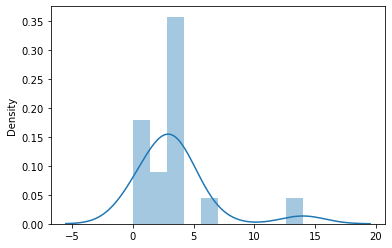

In [20]:
sns.distplot(df.skew())

we can easily visualize that this is right skewed. rhere are few players who won most games

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'walkDistance'),
  Text(2, 0, 'boosts'),
  Text(3, 0, 'weaponsAcquired'),
  Text(4, 0, 'damageDealt'),
  Text(5, 0, 'heals'),
  Text(6, 0, 'longestKill'),
  Text(7, 0, 'kills'),
  Text(8, 0, 'killStreaks'),
  Text(9, 0, 'revives'),
  Text(10, 0, 'rideDistance'),
  Text(11, 0, 'assists'),
  Text(12, 0, 'DBNOs'),
  Text(13, 0, 'headshotKills'),
  Text(14, 0, 'swimDistance'),
  Text(15, 0, 'killPlace'),
  Text(16, 0, 'winPlacePerc')])

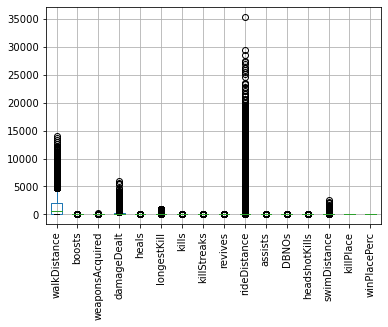

In [21]:
df.boxplot()
plt.xticks(rotation=90)

(array([1.042399e+06, 5.898300e+04, 9.267000e+03, 9.260000e+02,
        1.070000e+02, 3.700000e+01, 1.100000e+01, 9.000000e+00,
        2.000000e+00, 1.000000e+00]),
 array([    0.,  3540.,  7080., 10620., 14160., 17700., 21240., 24780.,
        28320., 31860., 35400.]),
 <BarContainer object of 10 artists>)

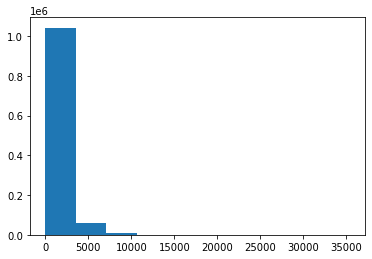

In [22]:
plt.hist(df["rideDistance"])

(array([7.16105e+05, 2.65143e+05, 1.15007e+05, 1.34720e+04, 1.41600e+03,
        4.08000e+02, 1.27000e+02, 4.30000e+01, 1.70000e+01, 4.00000e+00]),
 array([    0.,  1396.,  2792.,  4188.,  5584.,  6980.,  8376.,  9772.,
        11168., 12564., 13960.]),
 <BarContainer object of 10 artists>)

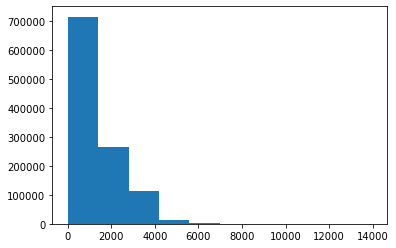

In [23]:
plt.hist(df["walkDistance"])

(array([1.103394e+06, 7.850000e+03, 3.980000e+02, 6.600000e+01,
        1.300000e+01, 1.400000e+01, 3.000000e+00, 3.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

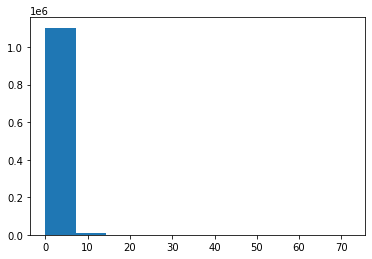

In [24]:
plt.hist(df["kills"])

(array([1.00105e+06, 1.09009e+05, 1.60400e+03, 5.20000e+01, 1.70000e+01,
        2.00000e+00, 6.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

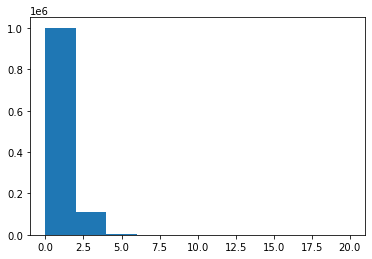

In [25]:
plt.hist(df["killStreaks"])

(array([155452., 121198., 115580., 102434.,  96567., 106141.,  93726.,
         96528., 107119., 116996.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

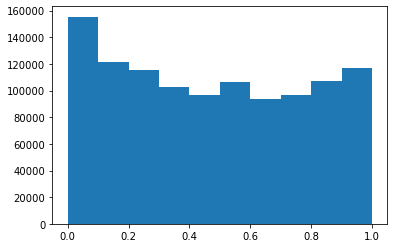

In [26]:
plt.hist(df["winPlacePerc"])

In [27]:
Q1=df.quantile(0.25)
Q1

walkDistance      155.2000
boosts              0.0000
weaponsAcquired     2.0000
damageDealt         0.0000
heals               0.0000
longestKill         0.0000
kills               0.0000
killStreaks         0.0000
revives             0.0000
rideDistance        0.0000
assists             0.0000
DBNOs               0.0000
headshotKills       0.0000
swimDistance        0.0000
killPlace          24.0000
winPlacePerc        0.2000
Name: 0.25, dtype: float64

In [28]:
Q3=df.quantile(0.75)
Q3

walkDistance      1,975.0000
boosts                2.0000
weaponsAcquired       5.0000
damageDealt         185.9000
heals                 2.0000
longestKill          21.3300
kills                 1.0000
killStreaks           1.0000
revives               0.0000
rideDistance          0.0793
assists               0.0000
DBNOs                 1.0000
headshotKills         0.0000
swimDistance          0.0000
killPlace            71.0000
winPlacePerc          0.7407
Name: 0.75, dtype: float64

In [29]:
IQR=Q3-Q1
IQR

walkDistance      1,819.8000
boosts                2.0000
weaponsAcquired       3.0000
damageDealt         185.9000
heals                 2.0000
longestKill          21.3300
kills                 1.0000
killStreaks           1.0000
revives               0.0000
rideDistance          0.0793
assists               0.0000
DBNOs                 1.0000
headshotKills         0.0000
swimDistance          0.0000
killPlace            47.0000
winPlacePerc          0.5407
dtype: float64

In [30]:
new_df=df[~((df<Q1-IQR*1.5)|(df>Q3+IQR*1.5))]

In [31]:
new_df

,walkDistance,boosts,weaponsAcquired,damageDealt,heals,longestKill,kills,killStreaks,revives,rideDistance,assists,DBNOs,headshotKills,swimDistance,killPlace,winPlacePerc
0,151.3000,0.0000,1.0000,25.9300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84,0.0667
1,"1,918.0000",0.0000,7.0000,36.7100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,57,0.5862
2,820.0000,1.0000,7.0000,47.7300,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0000,0.0000,0.0000,50,0.8105
3,38.8100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0000,0.0000,0.0000,0.0000,56,0.5556
4,"1,721.0000",2.0000,5.0000,100.0000,3.0000,7.7370,1.0000,1.0000,0.0000,nan,0.0000,0.0000,0.0000,0.0000,31,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,799.8000,0.0000,2.0000,70.3100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,68,0.3929
1111738,"2,777.0000",3.0000,7.0000,334.1000,1.0000,nan,2.0000,1.0000,0.0000,nan,0.0000,0.0000,0.0000,0.0000,10,0.8542
1111739,60.4500,0.0000,1.0000,119.3000,0.0000,2.8040,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,25,0.7174
1111740,"2,209.0000",4.0000,4.0000,53.5100,nan,0.0000,0.0000,0.0000,nan,nan,nan,1.0000,0.0000,0.0000,45,0.9000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'walkDistance'),
  Text(2, 0, 'boosts'),
  Text(3, 0, 'weaponsAcquired'),
  Text(4, 0, 'damageDealt'),
  Text(5, 0, 'heals'),
  Text(6, 0, 'longestKill'),
  Text(7, 0, 'kills'),
  Text(8, 0, 'killStreaks'),
  Text(9, 0, 'revives'),
  Text(10, 0, 'rideDistance'),
  Text(11, 0, 'assists'),
  Text(12, 0, 'DBNOs'),
  Text(13, 0, 'headshotKills'),
  Text(14, 0, 'swimDistance'),
  Text(15, 0, 'killPlace'),
  Text(16, 0, 'winPlacePerc')])

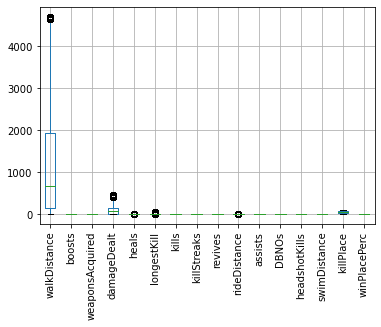

In [32]:
new_df.boxplot()
plt.xticks(rotation=90)

<AxesSubplot:xlabel='damageDealt'>

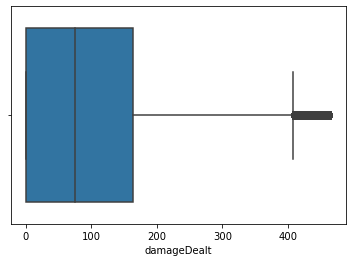

In [33]:
sns.boxplot(x=new_df['damageDealt'])

In [34]:
new_df.shape

(1111742, 16)

In [35]:
new_df.isna().sum()

walkDistance         6757
boosts              35533
weaponsAcquired     19803
damageDealt         54026
heals               81625
longestKill        153335
kills              129163
killStreaks         13391
revives            146345
rideDistance       277645
assists            194611
DBNOs               73607
headshotKills      187930
swimDistance        72617
killPlace               0
winPlacePerc            1
dtype: int64

we have so many missing values

In [36]:
new_df=new_df.fillna(new_df.mean())

In [37]:
new_df.isna().sum()

walkDistance       0
boosts             0
weaponsAcquired    0
damageDealt        0
heals              0
longestKill        0
kills              0
killStreaks        0
revives            0
rideDistance       0
assists            0
DBNOs              0
headshotKills      0
swimDistance       0
killPlace          0
winPlacePerc       0
dtype: int64

In [38]:
new_df.head()

,walkDistance,boosts,weaponsAcquired,damageDealt,heals,longestKill,kills,killStreaks,revives,rideDistance,assists,DBNOs,headshotKills,swimDistance,killPlace,winPlacePerc
0,151.3000,0.0000,1.0000,25.9300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84,0.0667
1,"1,918.0000",0.0000,7.0000,36.7100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,57,0.5862
2,820.0000,1.0000,7.0000,47.7300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,50,0.8105
3,38.8100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,56,0.5556
4,"1,721.0000",2.0000,5.0000,100.0000,3.0000,7.7370,1.0000,1.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,31,0.6429


conclusion: we colude that the winPlaceperc is mostly depends on the kills, walking distance and swim distance. that is more time you survive and kill and explore the game more chance of winning the game.